<h1><center><font size="6">Classification</font></center></h1>



In your second homework you need to create a model that predicts which passengers survived the Titanic shipwreck.

In [1]:
import pandas as pd
import numpy as np
import datetime
import sys
import os
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn import metrics

In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

# <a id='3'>Data exploration</a>  

We check the shape of train and test dataframes and also show a selection of rows, to have an initial understanding of the data.



In [3]:
train_df.sample(5).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
80,81,0,3,"Waelens, Mr. Achille",male,22.0,0,0,345767,9.0000,NaN,S
111,112,0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
569,570,1,3,"Jonsson, Mr. Carl",male,32.0,0,0,350417,7.8542,NaN,S
608,609,1,2,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",female,22.0,1,2,SC/Paris 2123,41.5792,NaN,C


In [4]:
test_df.sample(5).head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,909,3,"Assaf, Mr. Gerios",male,21.0,0,0,2692,7.2250,NaN,C
336,1228,2,"de Brito, Mr. Jose Joaquim",male,32.0,0,0,244360,13.0000,NaN,S
187,1079,3,"Davies, Mr. Joseph",male,17.0,2,0,A/4 48873,8.0500,NaN,S
260,1152,3,"de Messemaeker, Mr. Guillaume Joseph",male,36.5,1,0,345572,17.4000,NaN,S
68,960,1,"Tucker, Mr. Gilbert Milligan Jr",male,31.0,0,0,2543,28.5375,C53,C


In [5]:
print("Train: rows:{} cols:{}".format(train_df.shape[0], train_df.shape[1]))
print("Test:  rows:{} cols:{}".format(test_df.shape[0], test_df.shape[1]))

Train: rows:891 cols:12
Test:  rows:418 cols:11


Both **train** and **test** files contains the following values:  

* **PassengerID** - the index of the passenger (in the dataset);  
* **PClass** - the class of the passenger (from 1 to 3);
* **Name** - the name of the passenger;
* **Sex** - the sex of the passenger (female or male);  
* **Age** - the age (where available) of the passenger;  
* **SibSp** - the number of sibilings / spouses aboard of Titanic;  
* **Parch** - the number of parents / children aboard of Titanic;  
* **Ticket** - the ticket number;  
* **Fare** - the passenger fare (ticket cost);  
* **Cabin** - the cabin number;  
* **Embarked** - the place of embarcation of the passenger (C = Cherbourg, Q = Queenstown, S = Southampton).  

The **train** data has as well the target value, **Survived**.

It is important to have a good understanding of the data before going to create a model. Therefore we will explore the features.

Let's start by checking if there are missing data and unlabeled data.

Next, analyze the dependencies of the target variable on various features, such as Age, Sex, and so on, using approaches similar to those in the first homework.

Draw conclusions about what affects whether the passenger survives, check the distribution of features in the train and test data. 

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Написать, что пропущенные значения в обоих выборках, и привести переменные. В трейн, где столбец не 891, а меньше. В тесте, где столбец не 418, а меньше

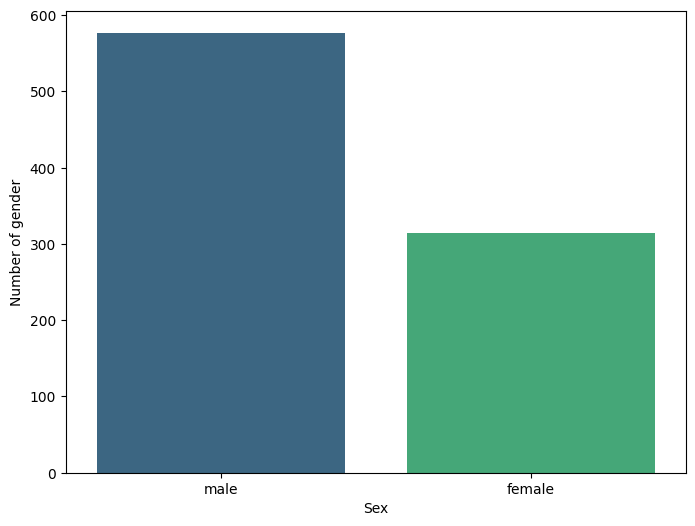

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sex = train_df['Sex'].value_counts().reset_index()
sex.columns = ['Sex', 'Count']

plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Count', data=sex, palette='viridis')
plt.xlabel('Sex')
plt.ylabel('Number of gender')
plt.show()

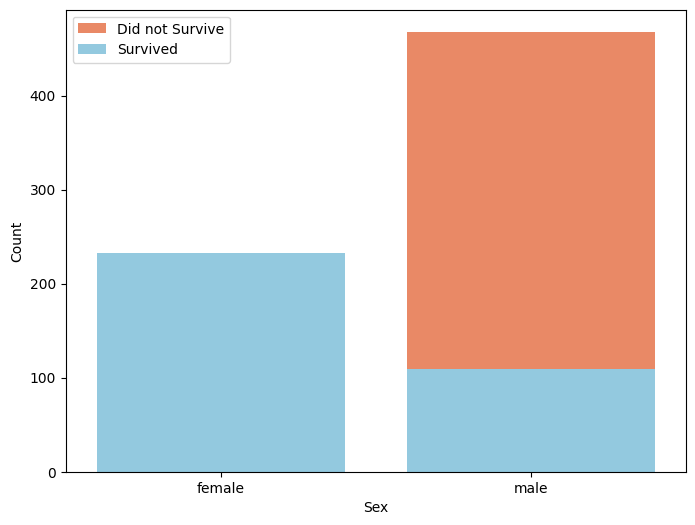

In [11]:
survived_sex = train_df.groupby(['Sex', 'Survived']).size().unstack()
survived_sex.columns = ['Not_Survived', 'Survived']
survived_sex = survived_sex.reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Not_Survived', data=survived_sex, color='coral', label='Did not Survive')
sns.barplot(x='Sex', y='Survived', data=survived_sex, color='skyblue', label='Survived')
plt.legend()
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

In [10]:
survived_sex['percent'] = survived_sex['Survived'] / (survived_sex['Survived'] +survived_sex['Not_Survived'])
survived_sex

,Sex,Not_Survived,Survived,percent
0,female,81,233,0.742038
1,male,468,109,0.188908


Описываешь

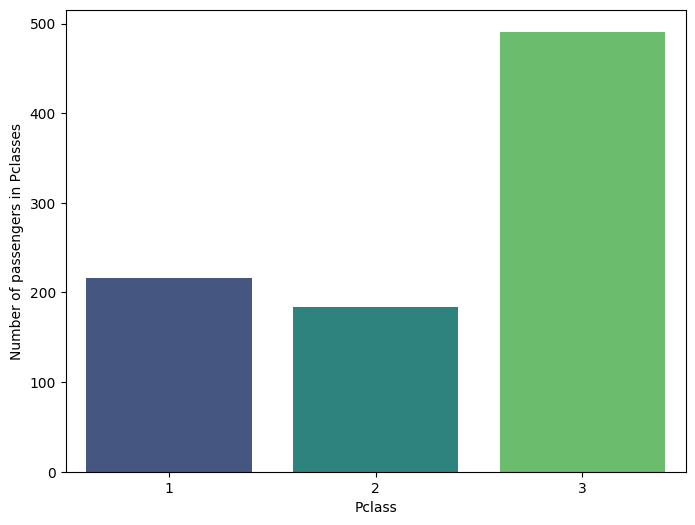

In [24]:
pclass = train_df['Pclass'].value_counts().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='count', data=pclass, palette='viridis')
plt.xlabel('Pclass')
plt.ylabel('Number of passengers in Pclasses')
plt.show()

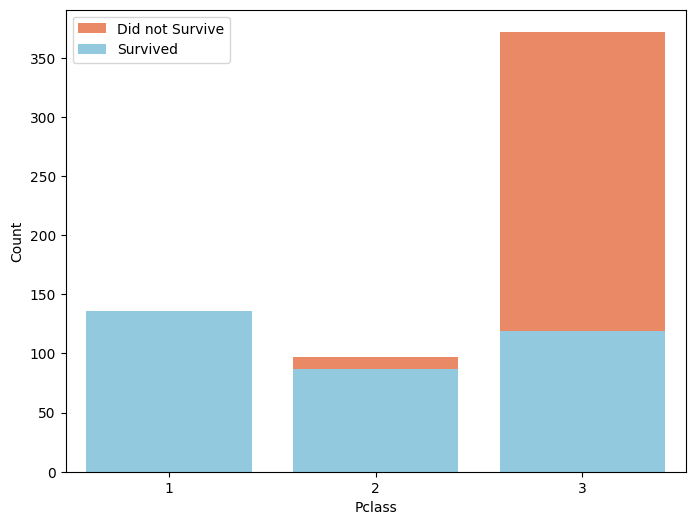

In [25]:
survived_pclass = train_df.groupby(['Pclass', 'Survived']).size().unstack()
survived_pclass.columns = ['Not_Survived', 'Survived']
survived_pclass = survived_pclass.reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Not_Survived', data=survived_pclass, color='coral', label='Did not Survive')
sns.barplot(x='Pclass', y='Survived', data=survived_pclass, color='skyblue', label='Survived')
plt.legend()
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

In [26]:
survived_pclass['percent'] = survived_pclass['Survived'] / (survived_pclass['Survived'] + survived_pclass['Not_Survived'])
survived_pclass

,Pclass,Not_Survived,Survived,percent
0,1,80,136,0.629630
1,2,97,87,0.472826
2,3,372,119,0.242363


Описываешь. Да я знаю, что в первом классе не видно умерших по графику, 3 часа ночи, тяжело

/Users/dimafomin/.pyenv/versions/3.10.11/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


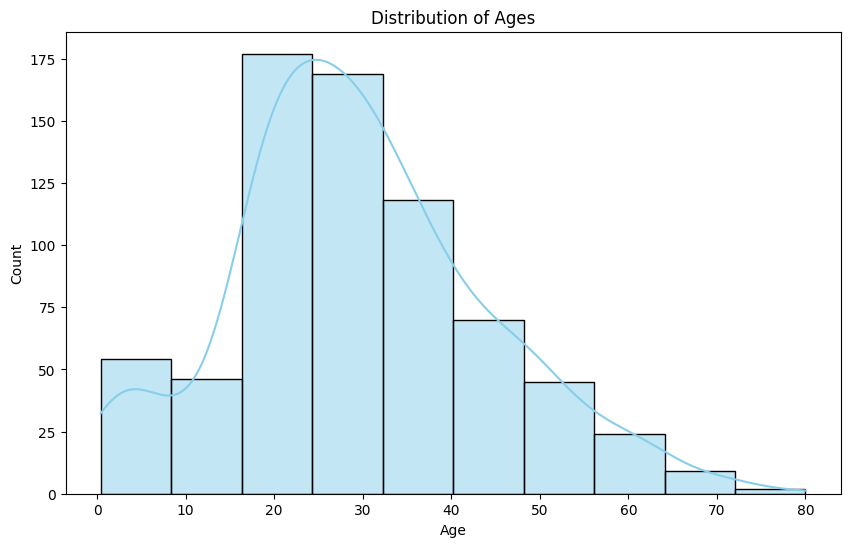

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Age'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

/Users/dimafomin/.pyenv/versions/3.10.11/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


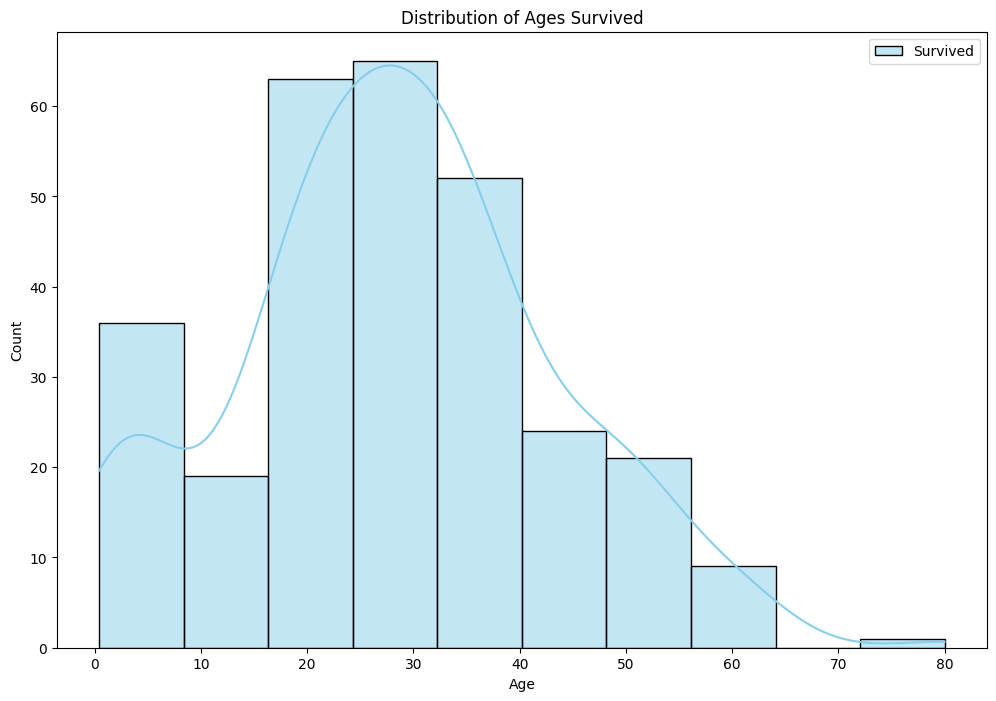

In [28]:
plt.figure(figsize=(12, 8))
sns.histplot(train_df[train_df['Survived'] == 1]['Age'], bins=10, kde=True, color='skyblue', label='Survived')
plt.title('Distribution of Ages Survived')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

/Users/dimafomin/.pyenv/versions/3.10.11/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


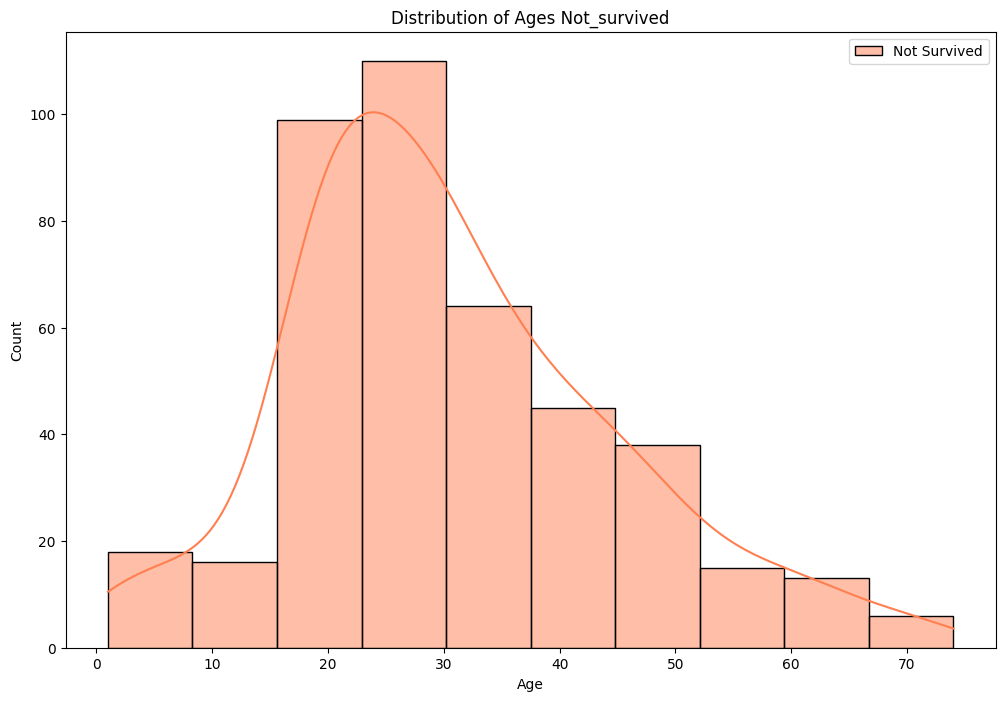

In [29]:
plt.figure(figsize=(12, 8))
sns.histplot(train_df[train_df['Survived'] == 0]['Age'], bins=10, kde=True, color='coral', label='Not Survived')
plt.title('Distribution of Ages Not_survived')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

In [30]:
train_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Опиши возраст

/Users/dimafomin/.pyenv/versions/3.10.11/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


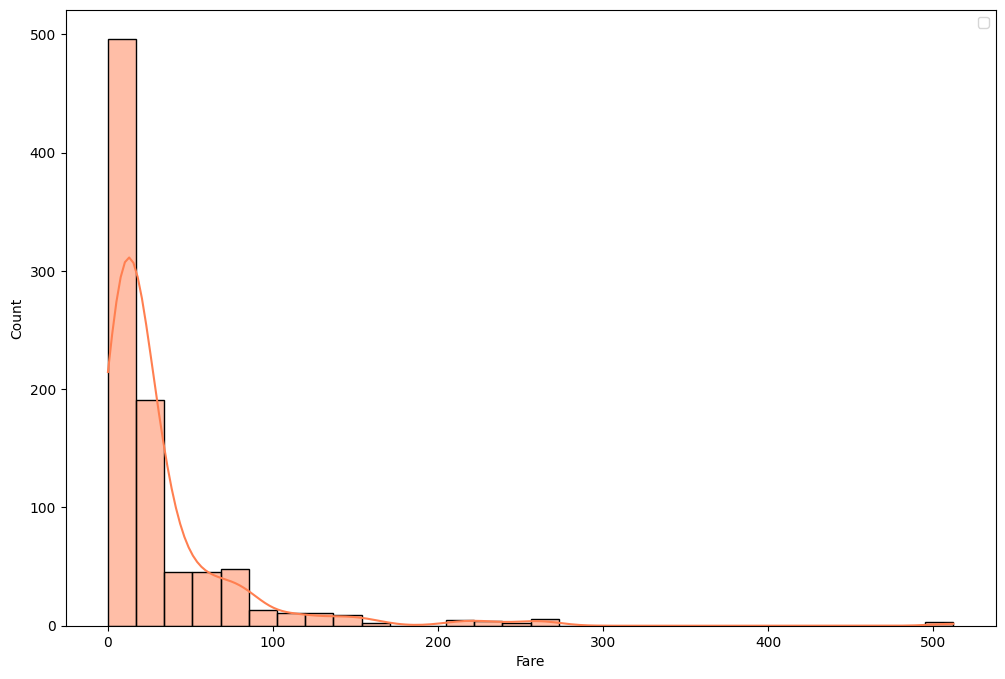

In [31]:
plt.figure(figsize=(12, 8))
sns.histplot(train_df['Fare'], bins=30, kde=True, color='coral')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend()
plt.show()

In [32]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Опиши распредление стоимости билетов

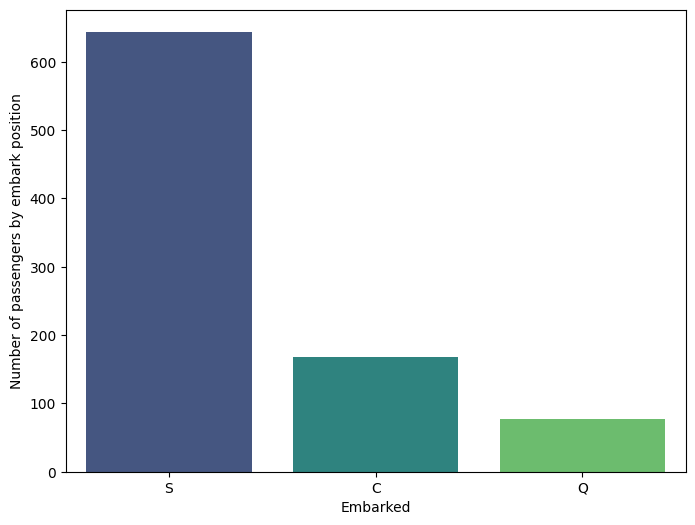

In [33]:
emb = train_df['Embarked'].value_counts().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Embarked', y='count', data=emb, palette='viridis')
plt.xlabel('Embarked')
plt.ylabel('Number of passengers by embark position')
plt.show()

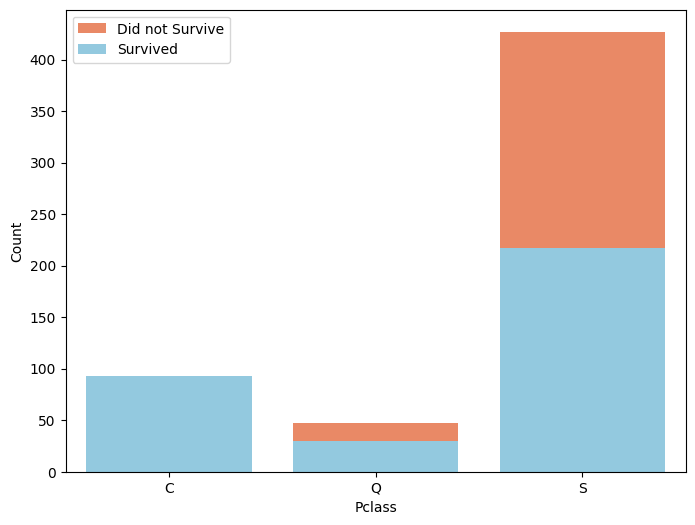

In [34]:
survived_emb = train_df.groupby(['Embarked', 'Survived']).size().unstack()
survived_emb.columns = ['Not_Survived', 'Survived']
survived_emb = survived_emb.reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Embarked', y='Not_Survived', data=survived_emb, color='coral', label='Did not Survive')
sns.barplot(x='Embarked', y='Survived', data=survived_emb, color='skyblue', label='Survived')
plt.legend()
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

In [35]:
survived_emb['percent'] = survived_emb['Survived'] / (survived_emb['Survived'] + survived_emb['Not_Survived'])
survived_emb

,Embarked,Not_Survived,Survived,percent
0,C,75,93,0.553571
1,Q,47,30,0.389610
2,S,427,217,0.336957


Опиcывай место посадки

Пиши резюме

*Example:*
From the total female passengers, *n*% survived.  
In the same time, from the total male passengers, only m% survived.


## <a id='50'>Split the data</a>  

Let's split the training and validation set. We will use a 80-20 split. Don't forget to fix random_state. 


Заполняем пропуски в месте посадки S, потому что наиболее распространенный вариант

In [36]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())

In [37]:
train_df['Sex'] = train_df['Sex'].apply(lambda x: 1 if x == 'female' else 0)

In [38]:
def get_emb(row):
    if row == 'C':
        return 0
    if row == 'Q':
        return 1
    if row == 'S':
        return 2
    
train_df['Embarked'] = train_df['Embarked'].apply(get_emb)

In [39]:
#your code is here
train, validation = train_test_split(train_df, test_size=0.2)


## <a id='51'>Build a model</a>  

We will start with a simple model (baseline), with just two features, the `Sex` and `Pclass`. Create DesicionTreeClassifier and RandomForestClassifier, based on this features, without tuning parameters. 

Next, create two more complicated models: DesicionTreeClassifier and RandomForestClassifier with adding at least one feature you found useful as a result of your analysis.

Find accuracy score for all models. Is it a good idea to use accuracy? Any suggestions about metrics? 

Then try to tune at least one parameter for every model using grid search and write down features and parameters, which gave you best score. 

Decision tree

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

features = ['Sex', 'Pclass']
target = 'Survived'

x_train = train[features]
y_train = train[target]

x_test = validation[features]
y_test = validation[target]

tree_1 = DecisionTreeClassifier(random_state=42)

tree_1.fit(x_train, y_train)

y_train_pred = tree_1.predict(x_train)
y_test_pred = tree_1.predict(x_test)

accuracy_score_train = accuracy_score(y_train, y_train_pred)
accuracy_score_test = accuracy_score(y_test, y_test_pred)

print(f'{accuracy_score_train:.4f}% on train - accuracy')
print(f'{accuracy_score_test:.4f}% on test - accuracy')


0.7921% on train - accuracy
0.7654% on test - accuracy


Random forest

In [41]:
features = ['Sex', 'Pclass']
target = 'Survived'

x_train = train[features]
y_train = train[target]

x_test = validation[features]
y_test = validation[target]

forest_1 = RandomForestClassifier(random_state=42)

forest_1.fit(x_train, y_train)

y_train_pred = forest_1.predict(x_train)
y_test_pred = forest_1.predict(x_test)

accuracy_score_train = accuracy_score(y_train, y_train_pred)
accuracy_score_test = accuracy_score(y_test, y_test_pred)

print(f'{accuracy_score_train:.4f}% on train - accuracy')
print(f'{accuracy_score_test:.4f}% on test - accuracy')

0.7921% on train - accuracy
0.7654% on test - accuracy


Decision tree adding new feature

In [42]:
features = ['Sex', 'Pclass', 'Age']
target = 'Survived'

x_train = train[features]
y_train = train[target]

x_test = validation[features]
y_test = validation[target]

tree_2 = DecisionTreeClassifier(random_state=42)

tree_2.fit(x_train, y_train)

y_train_pred = tree_2.predict(x_train)
y_test_pred = tree_2.predict(x_test)

accuracy_score_train = accuracy_score(y_train, y_train_pred)
accuracy_score_test = accuracy_score(y_test, y_test_pred)

print(f'{accuracy_score_train:.4f}% on train - accuracy')
print(f'{accuracy_score_test:.4f}% on test - accuracy')

0.8792% on train - accuracy
0.7821% on test - accuracy


Random forest adding new feature

In [43]:
features = ['Sex', 'Pclass', 'Age']
target = 'Survived'

x_train = train[features]
y_train = train[target]

x_test = validation[features]
y_test = validation[target]

forest_2 = RandomForestClassifier(random_state=42)

forest_2.fit(x_train, y_train)

y_train_pred = forest_2.predict(x_train)
y_test_pred = forest_2.predict(x_test)

accuracy_score_train = accuracy_score(y_train, y_train_pred)
accuracy_score_test = accuracy_score(y_test, y_test_pred)

print(f'{accuracy_score_train:.4f}% on train - accuracy')
print(f'{accuracy_score_test:.4f}% on test - accuracy')

0.8792% on train - accuracy
0.7989% on test - accuracy


Описывай метрики

In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

accuracy_score_train = accuracy_score(y_train, y_train_pred)
accuracy_score_test = accuracy_score(y_test, y_test_pred)

print(f'{accuracy_score_train:.4f}% on train - accuracy')
print(f'{accuracy_score_test:.4f}% on test - accuracy')

precision_score_train = precision_score(y_train, y_train_pred)
precision_score_test = precision_score(y_test, y_test_pred)

print(f'{precision_score_train:.4f}% on train - precision')
print(f'{precision_score_test:.4f}% on test - precision')

recall_score_train = recall_score(y_train, y_train_pred)
recall_score_test = recall_score(y_test, y_test_pred)

print(f'{recall_score_train:.4f}% on train - recall')
print(f'{recall_score_test:.4f}% on test - recall')

f1_score_train = f1_score(y_train, y_train_pred)
f1_score_test = f1_score(y_test, y_test_pred)

print(f'{f1_score_train:.4f}% on train - f1')
print(f'{f1_score_test:.4f}% on test - f1')

roc_auc_score_train = roc_auc_score(y_train, y_train_pred)
roc_auc_score_test = roc_auc_score(y_test, y_test_pred)

print(f'{roc_auc_score_train:.4f}% on train - roc-auc')
print(f'{roc_auc_score_test:.4f}% on test - roc-auc')


0.8792% on train - accuracy
0.7989% on test - accuracy
0.8577% on train - precision
0.8305% on test - precision
0.8127% on train - recall
0.6533% on test - recall
0.8346% on train - f1
0.7313% on test - f1
0.8659% on train - roc-auc
0.7786% on test - roc-auc


Decision tree with gridcv and new feature

In [52]:
from sklearn.model_selection import GridSearchCV

features = ['Sex', 'Pclass', 'Age', 'Embarked', 'Fare']
target = 'Survived'

x_train = train[features]
y_train = train[target]

x_test = validation[features]
y_test = validation[target]

x_train = train[features]
y_train = train[target]

x_test = validation[features]
y_test = validation[target]

params = {'max_depth': [None, 2, 4, 6, 8, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4, 8, 16],
        }

tree_gs = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=params,
    cv = 10,
    scoring = 'accuracy'
)

tree_gs.fit(x_train, y_train)
print("Best Parameters:", tree_gs.best_params_)

y_train_pred = tree_gs.predict(x_train)
y_test_pred = tree_gs.predict(x_test)

Best Parameters: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [53]:
accuracy_score_train = accuracy_score(y_train, y_train_pred)
accuracy_score_test = accuracy_score(y_test, y_test_pred)

print(f'{accuracy_score_train:.4f}% on train - accuracy')
print(f'{accuracy_score_test:.4f}% on test - accuracy')

precision_score_train = precision_score(y_train, y_train_pred)
precision_score_test = precision_score(y_test, y_test_pred)

print(f'{precision_score_train:.4f}% on train - precision')
print(f'{precision_score_test:.4f}% on test - precision')

recall_score_train = recall_score(y_train, y_train_pred)
recall_score_test = recall_score(y_test, y_test_pred)

print(f'{recall_score_train:.4f}% on train - recall')
print(f'{recall_score_test:.4f}% on test - recall')

f1_score_train = f1_score(y_train, y_train_pred)
f1_score_test = f1_score(y_test, y_test_pred)

print(f'{f1_score_train:.4f}% on train - f1')
print(f'{f1_score_test:.4f}% on test - f1')

roc_auc_score_train = roc_auc_score(y_train, y_train_pred)
roc_auc_score_test = roc_auc_score(y_test, y_test_pred)

print(f'{roc_auc_score_train:.4f}% on train - roc-auc')
print(f'{roc_auc_score_test:.4f}% on test - roc-auc')

0.8567% on train - accuracy
0.7654% on test - accuracy
0.9365% on train - precision
0.9024% on test - precision
0.6629% on train - recall
0.4933% on test - recall
0.7763% on train - f1
0.6379% on test - f1
0.8180% on train - roc-auc
0.7274% on test - roc-auc


Описывай модель со скорингом аккураси

In [ ]:
features = ['Sex', 'Pclass', 'Age', 'Embarked', 'Fare']
target = 'Survived'

x_train = train[features]
y_train = train[target]

x_test = validation[features]
y_test = validation[target]

x_train = train[features]
y_train = train[target]

x_test = validation[features]
y_test = validation[target]

params = {'max_depth': [None, 2, 4, 6, 8, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4, 8, 16],
        }

tree_gs = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=params,
    cv = 10,
    scoring = 'precision'
)

tree_gs.fit(x_train, y_train)
print("Best Parameters:", tree_gs.best_params_)

y_train_pred = tree_gs.predict(x_train)
y_test_pred = tree_gs.predict(x_test)

In [ ]:
accuracy_score_train = accuracy_score(y_train, y_train_pred)
accuracy_score_test = accuracy_score(y_test, y_test_pred)

print(f'{accuracy_score_train:.4f}% on train - accuracy')
print(f'{accuracy_score_test:.4f}% on test - accuracy')

precision_score_train = precision_score(y_train, y_train_pred)
precision_score_test = precision_score(y_test, y_test_pred)

print(f'{precision_score_train:.4f}% on train - precision')
print(f'{precision_score_test:.4f}% on test - precision')

recall_score_train = recall_score(y_train, y_train_pred)
recall_score_test = recall_score(y_test, y_test_pred)

print(f'{recall_score_train:.4f}% on train - recall')
print(f'{recall_score_test:.4f}% on test - recall')

f1_score_train = f1_score(y_train, y_train_pred)
f1_score_test = f1_score(y_test, y_test_pred)

print(f'{f1_score_train:.4f}% on train - f1')
print(f'{f1_score_test:.4f}% on test - f1')

roc_auc_score_train = roc_auc_score(y_train, y_train_pred)
roc_auc_score_test = roc_auc_score(y_test, y_test_pred)

print(f'{roc_auc_score_train:.4f}% on train - roc-auc')
print(f'{roc_auc_score_test:.4f}% on test - roc-auc')

Описывай модель со скорингом пресижн

In [ ]:
features = ['Sex', 'Pclass', 'Age', 'Embarked', 'Fare']
target = 'Survived'

x_train = train[features]
y_train = train[target]

x_test = validation[features]
y_test = validation[target]

x_train = train[features]
y_train = train[target]

x_test = validation[features]
y_test = validation[target]

params = {'max_depth': [None, 2, 4, 6, 8, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4, 8, 16],
        }

tree_gs = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=params,
    cv = 10,
    scoring = 'recall'
)

tree_gs.fit(x_train, y_train)
print("Best Parameters:", tree_gs.best_params_)

y_train_pred = tree_gs.predict(x_train)
y_test_pred = tree_gs.predict(x_test)

In [ ]:
accuracy_score_train = accuracy_score(y_train, y_train_pred)
accuracy_score_test = accuracy_score(y_test, y_test_pred)

print(f'{accuracy_score_train:.4f}% on train - accuracy')
print(f'{accuracy_score_test:.4f}% on test - accuracy')

precision_score_train = precision_score(y_train, y_train_pred)
precision_score_test = precision_score(y_test, y_test_pred)

print(f'{precision_score_train:.4f}% on train - precision')
print(f'{precision_score_test:.4f}% on test - precision')

recall_score_train = recall_score(y_train, y_train_pred)
recall_score_test = recall_score(y_test, y_test_pred)

print(f'{recall_score_train:.4f}% on train - recall')
print(f'{recall_score_test:.4f}% on test - recall')

f1_score_train = f1_score(y_train, y_train_pred)
f1_score_test = f1_score(y_test, y_test_pred)

print(f'{f1_score_train:.4f}% on train - f1')
print(f'{f1_score_test:.4f}% on test - f1')

roc_auc_score_train = roc_auc_score(y_train, y_train_pred)
roc_auc_score_test = roc_auc_score(y_test, y_test_pred)

print(f'{roc_auc_score_train:.4f}% on train - roc-auc')
print(f'{roc_auc_score_test:.4f}% on test - roc-auc')

Описываай модель со скорингом рекалл

In [54]:
features = ['Sex', 'Pclass', 'Age', 'Embarked', 'Fare']
target = 'Survived'

x_train = train[features]
y_train = train[target]

x_test = validation[features]
y_test = validation[target]

x_train = train[features]
y_train = train[target]

x_test = validation[features]
y_test = validation[target]

params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 2, 4, 6, 8, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8, 16],
}

forest_gs = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=params,
    cv = 10,
    scoring = 'accuracy'
)

forest_gs.fit(x_train, y_train)
print("Best Parameters:", forest_gs.best_params_)

y_train_pred = forest_gs.predict(x_train)
y_test_pred = forest_gs.predict(x_test)

Best Parameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [58]:
accuracy_score_train = accuracy_score(y_train, y_train_pred)
accuracy_score_test = accuracy_score(y_test, y_test_pred)

print(f'{accuracy_score_train:.4f}% on train - accuracy')
print(f'{accuracy_score_test:.4f}% on test - accuracy')

precision_score_train = precision_score(y_train, y_train_pred)
precision_score_test = precision_score(y_test, y_test_pred)

print(f'{precision_score_train:.4f}% on train - precision')
print(f'{precision_score_test:.4f}% on test - precision')

recall_score_train = recall_score(y_train, y_train_pred)
recall_score_test = recall_score(y_test, y_test_pred)

print(f'{recall_score_train:.4f}% on train - recall')
print(f'{recall_score_test:.4f}% on test - recall')

f1_score_train = f1_score(y_train, y_train_pred)
f1_score_test = f1_score(y_test, y_test_pred)

print(f'{f1_score_train:.4f}% on train - f1')
print(f'{f1_score_test:.4f}% on test - f1')

roc_auc_score_train = roc_auc_score(y_train, y_train_pred)
roc_auc_score_test = roc_auc_score(y_test, y_test_pred)

print(f'{roc_auc_score_train:.4f}% on train - roc-auc')
print(f'{roc_auc_score_test:.4f}% on test - roc-auc')

0.8525% on train - accuracy
0.7933% on test - accuracy
0.8971% on train - precision
0.8958% on test - precision
0.6854% on train - recall
0.5733% on test - recall
0.7771% on train - f1
0.6992% on test - f1
0.8191% on train - roc-auc
0.7626% on test - roc-auc


Описывай модель со скорингом аккураси

In [ ]:
features = ['Sex', 'Pclass', 'Age', 'Embarked', 'Fare']
target = 'Survived'

x_train = train[features]
y_train = train[target]

x_test = validation[features]
y_test = validation[target]

x_train = train[features]
y_train = train[target]

x_test = validation[features]
y_test = validation[target]

params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 2, 4, 6, 8, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8, 16],
}

forest_gs = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=params,
    cv = 10,
    scoring = 'precision'
)

forest_gs.fit(x_train, y_train)
print("Best Parameters:", forest_gs.best_params_)

y_train_pred = forest_gs.predict(x_train)
y_test_pred = forest_gs.predict(x_test)

In [ ]:
accuracy_score_train = accuracy_score(y_train, y_train_pred)
accuracy_score_test = accuracy_score(y_test, y_test_pred)

print(f'{accuracy_score_train:.4f}% on train - accuracy')
print(f'{accuracy_score_test:.4f}% on test - accuracy')

precision_score_train = precision_score(y_train, y_train_pred)
precision_score_test = precision_score(y_test, y_test_pred)

print(f'{precision_score_train:.4f}% on train - precision')
print(f'{precision_score_test:.4f}% on test - precision')

recall_score_train = recall_score(y_train, y_train_pred)
recall_score_test = recall_score(y_test, y_test_pred)

print(f'{recall_score_train:.4f}% on train - recall')
print(f'{recall_score_test:.4f}% on test - recall')

f1_score_train = f1_score(y_train, y_train_pred)
f1_score_test = f1_score(y_test, y_test_pred)

print(f'{f1_score_train:.4f}% on train - f1')
print(f'{f1_score_test:.4f}% on test - f1')

roc_auc_score_train = roc_auc_score(y_train, y_train_pred)
roc_auc_score_test = roc_auc_score(y_test, y_test_pred)

print(f'{roc_auc_score_train:.4f}% on train - roc-auc')
print(f'{roc_auc_score_test:.4f}% on test - roc-auc')

Описывай модель со скорингом пресижн

In [ ]:
features = ['Sex', 'Pclass', 'Age', 'Embarked', 'Fare']
target = 'Survived'

x_train = train[features]
y_train = train[target]

x_test = validation[features]
y_test = validation[target]

x_train = train[features]
y_train = train[target]

x_test = validation[features]
y_test = validation[target]

params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 2, 4, 6, 8, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8, 16],
}

forest_gs = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=params,
    cv = 10,
    scoring = 'recall'
)

forest_gs.fit(x_train, y_train)
print("Best Parameters:", forest_gs.best_params_)

y_train_pred = forest_gs.predict(x_train)
y_test_pred = forest_gs.predict(x_test)

In [ ]:
accuracy_score_train = accuracy_score(y_train, y_train_pred)
accuracy_score_test = accuracy_score(y_test, y_test_pred)

print(f'{accuracy_score_train:.4f}% on train - accuracy')
print(f'{accuracy_score_test:.4f}% on test - accuracy')

precision_score_train = precision_score(y_train, y_train_pred)
precision_score_test = precision_score(y_test, y_test_pred)

print(f'{precision_score_train:.4f}% on train - precision')
print(f'{precision_score_test:.4f}% on test - precision')

recall_score_train = recall_score(y_train, y_train_pred)
recall_score_test = recall_score(y_test, y_test_pred)

print(f'{recall_score_train:.4f}% on train - recall')
print(f'{recall_score_test:.4f}% on test - recall')

f1_score_train = f1_score(y_train, y_train_pred)
f1_score_test = f1_score(y_test, y_test_pred)

print(f'{f1_score_train:.4f}% on train - f1')
print(f'{f1_score_test:.4f}% on test - f1')

roc_auc_score_train = roc_auc_score(y_train, y_train_pred)
roc_auc_score_test = roc_auc_score(y_test, y_test_pred)

print(f'{roc_auc_score_train:.4f}% on train - roc-auc')
print(f'{roc_auc_score_test:.4f}% on test - roc-auc')

описывай модель со скорингом рекалл

Общее резюме пиши